In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = r"C:\Users\maned\Documents\Lead Scoring Assignment\Leads.csv"  # Update this path as per your system
leads = pd.read_csv(file_path)

In [3]:
# Display the first few rows
print(leads.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

In [4]:
# Get summary information
print(leads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Check basic statistics
print(leads.describe())

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

In [6]:
# Check for missing values
print(leads.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Drop columns with too many missing values (if necessary)
leads.dropna(axis=1, thresh=0.5 * len(leads), inplace=True)  # Removes columns with more than 50% missing values

In [8]:
# Replace 'Select' values with NaN (null values)
leads.replace("Select", pd.NA, inplace=True)

In [9]:
# Drop rows with missing values
leads.dropna(inplace=True)

In [10]:
# Find and remove duplicate rows
print("Duplicate Rows: ", leads.duplicated().sum())
leads.drop_duplicates(inplace=True)

Duplicate Rows:  0


In [11]:
# Convert categorical variables using one-hot encoding
leads = pd.get_dummies(leads, drop_first=True)

In [12]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = leads.select_dtypes(include=['int64', 'float64']).columns




In [13]:
# Scale the numerical columns
scaler = StandardScaler()
leads[num_cols] = scaler.fit_transform(leads[num_cols])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Define independent variables (X) and target variable (y)
X = leads.drop(columns=['Converted'])  # Drop target variable
y = leads['Converted']  # Define target variable

In [16]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

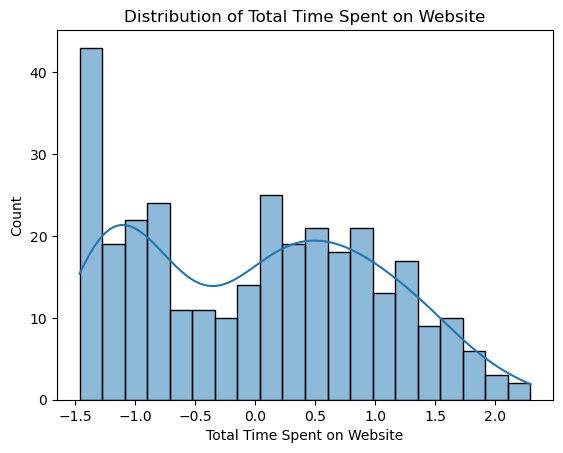

In [18]:
# Histogram of Total Time Spent on Website
sns.histplot(leads['Total Time Spent on Website'], bins=20, kde=True)
plt.title("Distribution of Total Time Spent on Website")
plt.show()

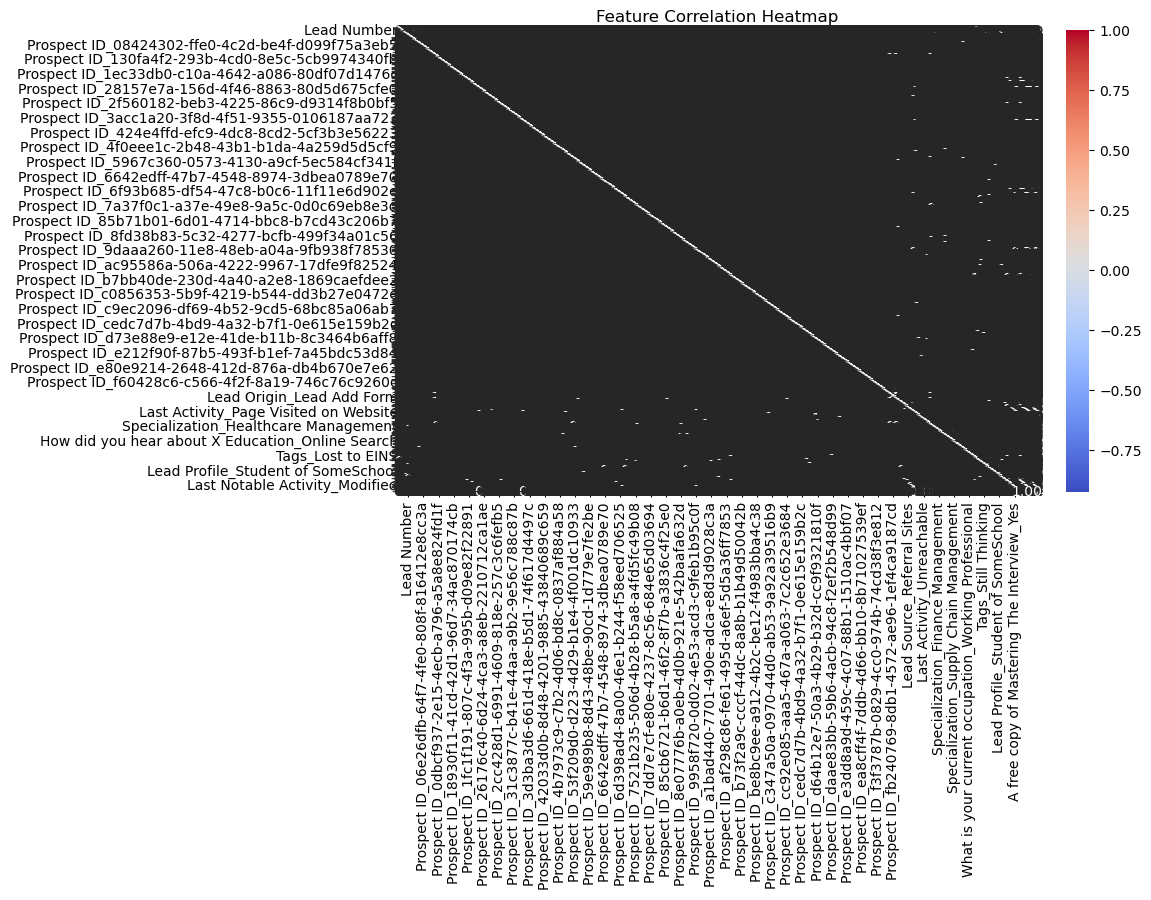

In [19]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(leads.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [43]:
print(y_train.unique())
print(y_train.dtype)  # Check data type


[ 0.68718427 -1.45521375]
float64


In [45]:
y_train = y_train.round().astype(int)
y_test = y_test.round().astype(int)


In [47]:
print(y_train.unique())  # Should print [0, 1]
print(y_train.dtype)  # Should be int

[ 1 -1]
int32


In [51]:
leads['Converted'] = leads['Converted'].astype(int)


In [53]:
y = leads['Converted']


In [55]:
print(y_train.isnull().sum())  # Should print 0


0


In [57]:
y_train = y_train.apply(lambda x: 1 if x >= 0.5 else 0)
y_test = y_test.apply(lambda x: 1 if x >= 0.5 else 0)


In [59]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

print("Model trained successfully!")


Model trained successfully!


In [61]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

In [65]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability scores

In [67]:
# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.96875
Precision: 0.975
Recall: 0.975
F1 Score: 0.975


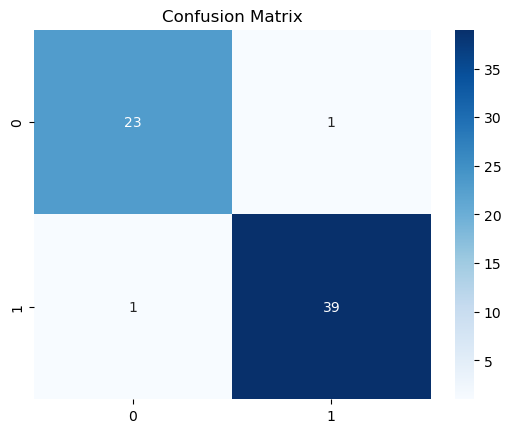

In [69]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [73]:
print(f"Length of y_pred_prob: {len(y_pred_prob)}")
print(f"Length of leads: {len(leads)}")


Length of y_pred_prob: 64
Length of leads: 318


In [75]:
# Ensure predicted probabilities match X_test length
y_pred_prob = model.predict_proba(X_test)[:, 1]  

# Convert probabilities into scores (0-100)
lead_scores = (y_pred_prob * 100).astype(int)

# Ensure leads matches X_test
leads = X_test.copy()
leads = leads.reset_index(drop=True)  # Reset index to match lengths
lead_scores = pd.Series(lead_scores).reset_index(drop=True)  # Reset index for safety

# Assign scores
leads['Lead Score'] = lead_scores  

# Check if assigned correctly
print(leads[['Lead Score']].head())


   Lead Score
0           7
1          96
2          57
3           2
4          95


In [79]:
# Convert probabilities into a score (0-100)
lead_scores = (y_pred_prob * 100).astype(int)
leads['Lead Score'] = lead_scores

# Define a threshold to classify Hot and Cold leads
threshold = 50
leads['Lead Category'] = ['Hot' if score >= threshold else 'Cold' for score in lead_scores]

print(leads[['Lead Score', 'Lead Category']].head())

   Lead Score Lead Category
0           7          Cold
1          96           Hot
2          57           Hot
3           2          Cold
4          95           Hot


In [81]:
# Get feature importance (logistic regression coefficients)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head(3))


                                      Feature  Importance
381  Tags_Will revert after reading the email    3.056878
371                   Tags_Closed by Horizzon    1.943370
388               Lead Profile_Potential Lead    1.013107


In [83]:
leads.to_csv(r"C:\Users\maned\Documents\Lead Scoring Assignment\Cleaned_Leads.csv", index=False)
